### Packages

In [3]:
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
# import the necessary packages
import os
import cv2
import glob
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from random import randint
from tensorflow.keras.models import Model
from scripts import AspectAwarePreprocessor
from scripts import ImageToArrayPreprocessor
from tensorflow.keras.models import load_model
from scripts import printProgressBar, loadData
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

### data

In [5]:
# initialize the image preprocessors
aap = AspectAwarePreprocessor(112, 112)
iap = ImageToArrayPreprocessor()

In [6]:
# dataset
dataset, labels = loadData("../data/", preprocessors=[aap, iap])
dataset = dataset.astype('float32') / 255.0

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [7]:
print(dataset.shape)

(117, 112, 112, 3)


### History

In [8]:
with open("../logs/plot_CNN.pck", 'rb') as fp:
    H_CNN = pickle.load(fp)

In [9]:
# construct a plot that plots and saves the training history
def plot_loss(H, t):
    N = np.arange(0, t)
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(N, H["loss"], label="train_loss")
    plt.plot(N, H["val_loss"], label="val_loss")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show();

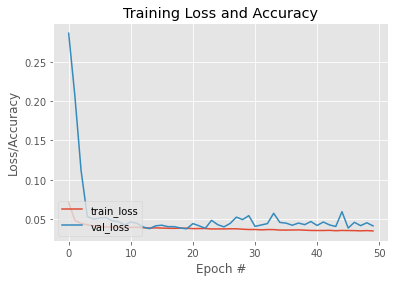

In [10]:
plot_loss(H_CNN, 50)

### Latent

In [9]:
autoencoder = tf.keras.models.load_model("../models/CNN_model.h5")

In [10]:
# load encoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("encoder").output)

In [11]:
def plot_latent(indice, encoder, autoencoder, sets):
    code = encoder.predict(sets[indice].reshape(1, 112, 112, 3))
    reco = autoencoder.predict(sets[indice].reshape(1, 112, 112, 3))

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(array_to_img((sets[indice] * 255).astype("uint8")), vmin=0, vmax=255)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape(16, 16))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(array_to_img(((reco.reshape(112, 112, 3) * 255).astype("uint8"))), vmin=0, vmax=255)
    plt.show();

In [12]:
indices = []
for _ in range(5):
    indices.append(randint(0, dataset.shape[0]-1))

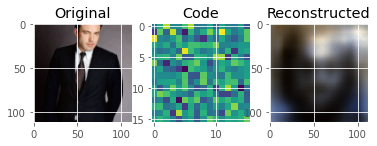

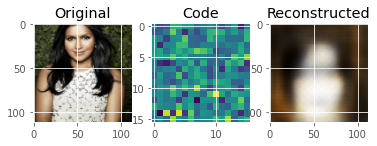

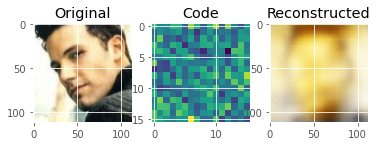

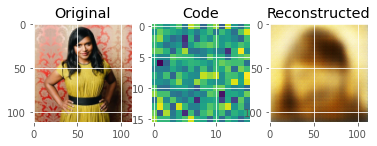

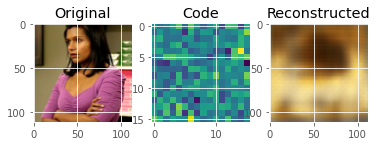

In [13]:
for indice in indices:
    plot_latent(indice, encoder, autoencoder, dataset)